In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pickle as pkl

In [5]:
with open("cleaned_df.pkl","rb") as f:
    cleaned_autos = pkl.load(f)  ## Loading data from cleaned_df.pkl

In [6]:
df=cleaned_autos.copy()

## No of Vehicles by Brand Available on ebay for sale with the help of visualization


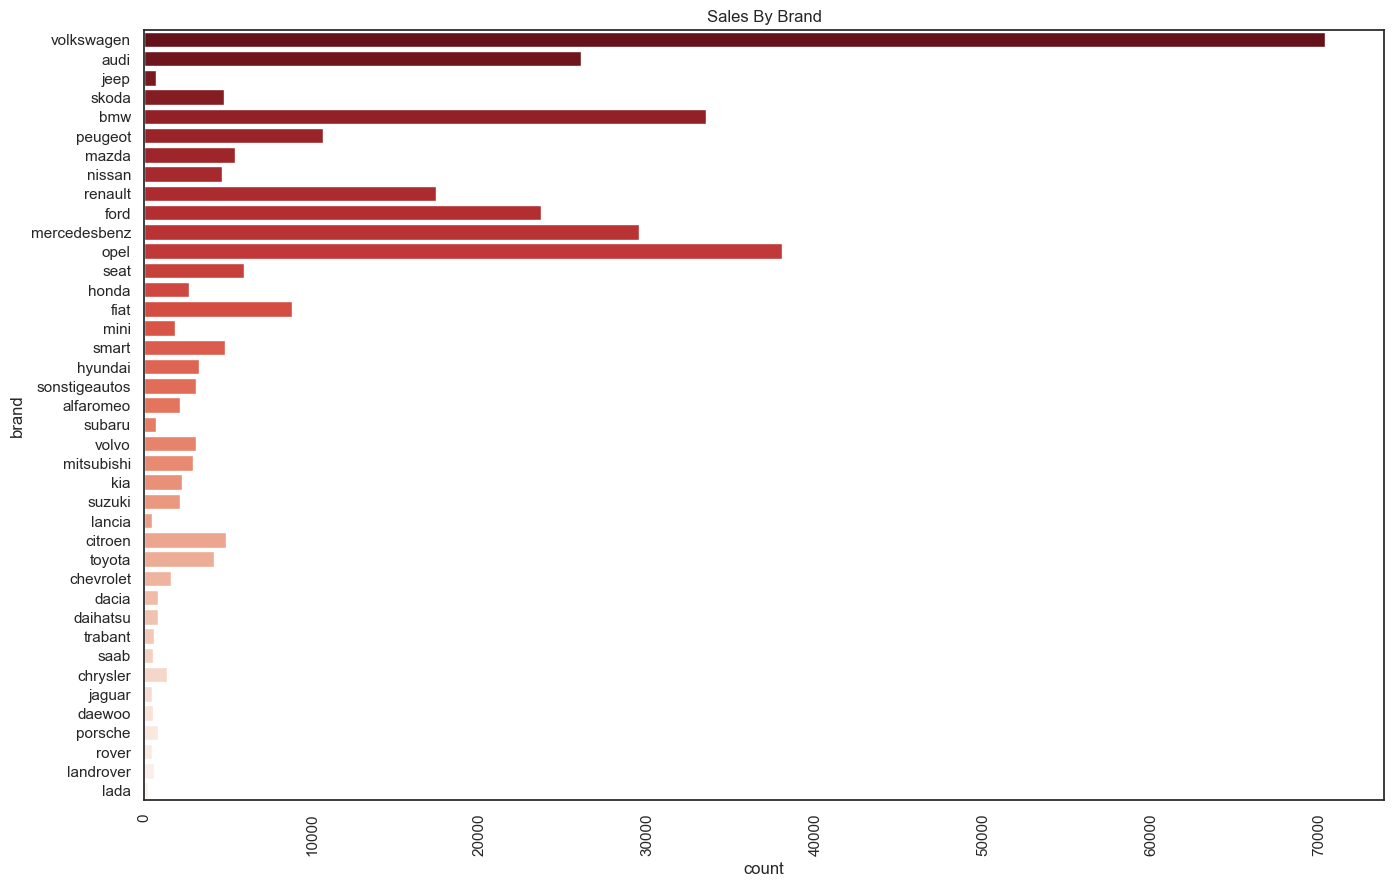

In [6]:
plt.figure(figsize=(16,10))
sns.countplot(y='brand', data=df, palette="Reds_r")
plt.title("Sales By Brand")
plt.xticks(rotation=90)
plt.show()

In [8]:
df

,name,seller,model,brand,offerType,dollar_price,yearOfRegistration,monthOfRegistration,vehicleType,gearbox,fuelType,kilometer,notRepairedDamage,abtest,powerPS,postalCode,dateCrawled,dateCreated,lastSeen
0,Golf31.6,private,golf,volkswagen,Offer,528,1993,Jan,Other,manual,petrol,150000,other,test,0,70435,2016-03-24 11:52:17,2016-03-24,2016-04-07 03:16:57
1,A5Sportback2.7Tdi,private,Other,audi,Offer,20130,2011,May,coupe,manual,diesel,125000,yes,test,190,66954,2016-03-24 10:58:45,2016-03-24,2016-04-07 01:46:50
2,"JeepGrandCherokee""Overland""",private,grand,jeep,Offer,10780,2004,Aug,suv,automatic,diesel,125000,other,test,163,90480,2016-03-14 12:52:21,2016-03-14,2016-04-05 12:47:46
3,GOLF4143TÜRER,private,golf,volkswagen,Offer,1650,2001,Jun,kleinwagen,manual,petrol,150000,no,test,75,91074,2016-03-17 16:54:04,2016-03-17,2016-03-17 17:40:17
4,SkodaFabia1.4TDIPDClassic,private,fabia,skoda,Offer,3960,2008,Jul,kleinwagen,manual,diesel,90000,no,test,69,60437,2016-03-31 17:25:20,2016-03-31,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371522,MitsubishiCold,private,colt,mitsubishi,Offer,0,2005,Jul,Other,manual,petrol,150000,yes,control,0,2694,2016-03-21 09:50:58,2016-03-21,2016-03-21 10:42:49
371523,Suchet4vitoab6sitze,private,Other,sonstigeautos,Offer,2420,2005,Jan,Other,Unspecified,other,20000,other,test,0,39576,2016-03-14 17:48:27,2016-03-14,2016-04-06 00:46:52
371524,Smartsmartleistungssteigerung100ps,private,fortwo,smart,Offer,1318,2000,Mar,cabrio,automatic,petrol,125000,no,test,101,26135,2016-03-05 19:56:21,2016-03-05,2016-03-11 18:17:12
371525,VolkswagenMultivanT4TDI7DCUY2,private,transporter,volkswagen,Offer,10120,1996,Mar,bus,manual,diesel,150000,no,test,102,87439,2016-03-19 18:57:12,2016-03-19,2016-04-07 07:15:26


## What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis?

## Numerical Analysis

In [9]:
average_price = df.groupby(['vehicleType', 'gearbox'])['dollar_price'].mean()
average_price = average_price.reset_index()
print(average_price)

   vehicleType      gearbox  dollar_price
0        Other  Unspecified    983.913726
1        Other    automatic   1984.482416
2        Other       manual   1597.315678
3       andere  Unspecified   1380.204545
4       andere    automatic   3191.927711
5       andere       manual   2706.367448
6          bus  Unspecified   3836.334194
7          bus    automatic   6291.533188
8          bus       manual   5002.730977
9       cabrio  Unspecified   5234.586861
10      cabrio    automatic   9915.679416
11      cabrio       manual   7093.584054
12       coupe  Unspecified   5347.748401
13       coupe    automatic  10503.942934
14       coupe       manual   6204.866356
15  kleinwagen  Unspecified   1663.087129
16  kleinwagen    automatic   2290.036424
17  kleinwagen       manual   1884.578313
18       kombi  Unspecified   2805.789813
19       kombi    automatic   5732.253645
20       kombi       manual   3989.893108
21   limousine  Unspecified   2911.283461
22   limousine    automatic   5397

## visualization

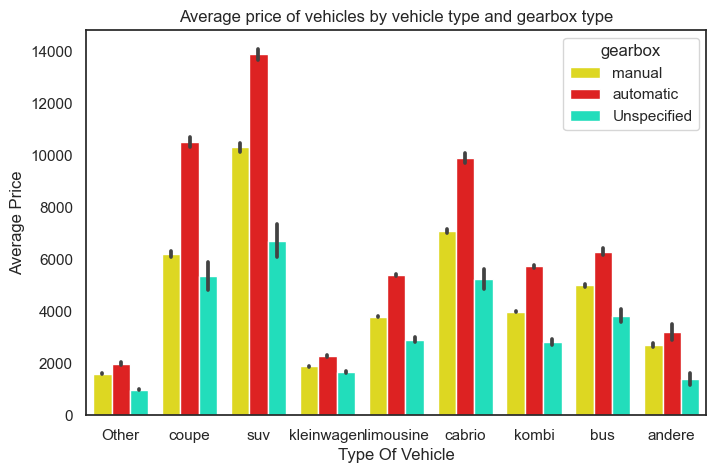

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#fcf403", "#fc0303","#03fccf"]
sns.barplot(x="vehicleType", y="dollar_price",hue="gearbox", palette=colors, data=df)
ax.set_title("Average price of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

## What is the marginal probability of private seller?

In [14]:
margin = (df['seller'] == 'private').mean()
print(f"The marginal probability of 'private' seller is {margin:.2f}")


The marginal probability of 'private' seller is 1.00
